In [15]:
"""
OBEREG
1 - New England CT ME MA NH RI VT
2 - Mid East DE DC MD NJ NY PA
3 - Great Lakes IL IN MI OH WI
4 - Plains IA KS MN MO NE ND SD
5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV
6 - Southwest AZ NM OK TX
7 - Rocky Mountains CO ID MT UT WY
8 - Far West AK CA HI NV OR WA
9 - Outlying areas AS FM GU MH MP PR PW VI
"""


,Year,black_values,black_pct,hispanic_value,hispanic_pct,women_values,women_pct,grand_total
0,2002,46,1%,76,1.7%,690,13.8%,4982
1,2003,44,0.9%,78,1.7%,704,14.0%,5014
2,2004,53,1.1%,92,2.0%,748,14.4%,5179
3,2005,56,1.1%,90,1.7%,888,14.9%,5862
4,2006,68,1.3%,93,1.7%,898,15.4%,5851
5,2007,62,1.2%,94,1.8%,933,15.8%,5909
6,2008,75,1.3%,102,1.7%,1070,16.6%,6443
7,2009,75,1.3%,127,2.3%,1080,17.0%,6363
8,2010,77,1.3%,126,2.1%,1173,17.6%,6667
9,2011,83,1.4%,137,2.3%,1208,19.0%,6374


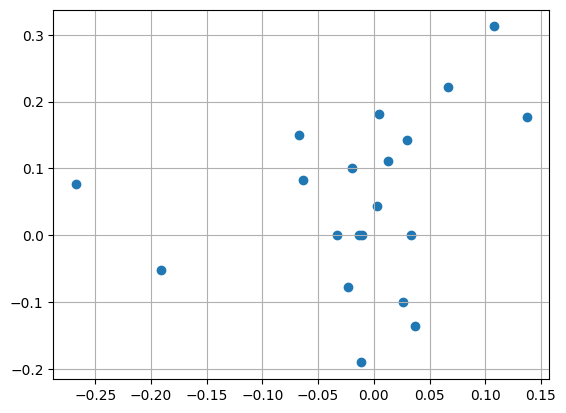

In [16]:
plt.scatter(merged['black_cs'].pct_change(), merged['black_pct'].pct_change())
plt.grid()

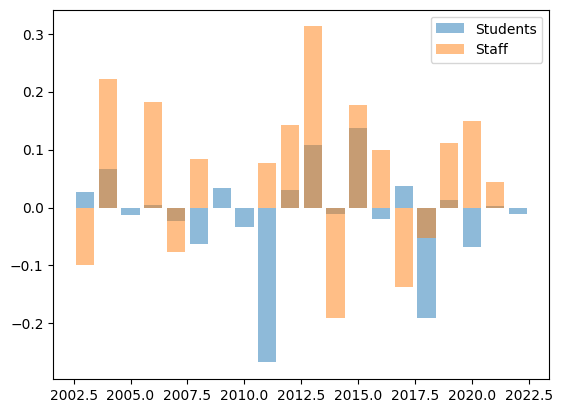

In [17]:
plt.bar(range(2002, 2023), merged['black_cs'].pct_change(), alpha=0.5, label='Students')
# plt.plot(merged['black_cs'].pct_change())
plt.bar(range(2002, 2023), merged['black_pct'].pct_change(), alpha=0.5, label='Staff')
# plt.plot(merged['black_pct'].pct_change())
plt.legend()
# plt.twinx()
# plt.plot(cs_staff['black_pct'], color='red')

In [18]:

# merged.to_csv('taulbee_vs_cs_stats.csv')

,Year,black_pct,hispanic_pct,women_pct
0,2002,0.010,0.017,0.138
1,2003,0.009,0.017,0.140
2,2004,0.011,0.020,0.144
3,2005,0.011,0.017,0.149
4,2006,0.013,0.017,0.154
5,2007,0.012,0.018,0.158
6,2008,0.013,0.017,0.166
7,2009,0.013,0.023,0.170
8,2010,0.013,0.021,0.176
9,2011,0.014,0.023,0.190


In [19]:
# import pandas as pd
# from matplotlib import pyplot as plt

# stud   = pd.read_csv('all_student_inst.csv',index_col=0)

# stud = stud[stud['CARNEGIE'].apply(lambda x: x in [15, 16, 31, 32])]
# stud.head()

In [20]:

# inst = stud[stud['INSTNM']=='Clemson University']
# inst

In [21]:

import pandas as pd
from matplotlib import pyplot as plt
cs_staff   = pd.read_csv('taulbee_csstaff.csv')
cs_staff.columns = [x.strip() for x in cs_staff.columns]
cs = cs_staff[['Year', 'black_pct', 'hispanic_pct', 'women_pct']]
cs_staff
staff   = pd.read_csv('all_staff_inst.csv',index_col=0)
staff['Grand total']      =staff['Grand total'].str.replace(',','')
staff['Grand total women']=staff['Grand total women'].str.replace(',','')
staff['OBEREG']           =staff['OBEREG'].astype(float)
staff['Grand total']      =staff['Grand total'].astype(float)
staff['Grand total women']=staff['Grand total women'].astype(float)

# staff_size  = staff[staff["INSTSIZE"] == 2]  
# staff_reg   = staff[staff["OBEREG"]==8]
# stud_size   = stud[stud["INSTSIZE"] == 5]  
# stud_reg   = stud[stud["OBEREG"]==7]




cs.set_index('Year', inplace=True)
cs = cs.apply(lambda col: col.apply(lambda x: float(x[:-1]))/100)
cs.reset_index(inplace=True)
cs


staff_set                      = staff.groupby('Year')[[ 'Grand total','Black total','Hispanic total','Grand total women' ]].mean()
staff_set['Black total']       = staff_set['Black total']/staff_set['Grand total']
staff_set['Hispanic total']    = staff_set['Hispanic total']/staff_set['Grand total']
staff_set['Grand total women'] = staff_set['Grand total women']/staff_set['Grand total']
staff_set = staff_set.rename(columns={"Black total":"black_staff_stat"})
staff_set = staff_set.rename(columns={"Hispanic total":"hispanic_staff_stat"})
staff_set = staff_set.rename(columns={"Grand total women":"women_staff_stat"})
staff_set

stud_set = stud.groupby('Year')[[ 'grand_total','black_total','hispanic_total','women_total', 'total_cs','black_cs','hispanic_cs','women_cs', ]].mean()
stud_set['black_cs']           = stud_set['black_cs']/(stud_set['total_cs'])
stud_set['hispanic_cs']        = stud_set['hispanic_cs']/stud_set['total_cs']
stud_set['women_cs']           = stud_set['women_cs']/stud_set['total_cs']
stud_set['black_noncs']        = (stud_set['black_total']-stud_set['black_cs'])/stud_set['grand_total']
stud_set['hispanic_noncs']     = (stud_set['hispanic_total']-stud_set['hispanic_cs'])/stud_set['grand_total']
stud_set['women_noncs']        = (stud_set['women_total']-stud_set['women_cs'])/stud_set['grand_total']
stud_set= stud_set.reset_index()
merged = pd.merge(cs, stud_set, on='Year')
merged


,Year,black_pct,hispanic_pct,women_pct,grand_total,black_total,hispanic_total,women_total,total_cs,black_cs,hispanic_cs,women_cs,black_noncs,hispanic_noncs,women_noncs
0,2002,0.010,0.017,0.138,1106.885073,82.758256,70.301189,621.264201,46.552805,0.076247,0.043919,0.242884,0.074698,0.063473,0.561053
1,2003,0.009,0.017,0.140,1060.791005,77.742063,66.150794,596.026455,42.222603,0.078230,0.043475,0.251156,0.073213,0.062319,0.561633
2,2004,0.011,0.020,0.144,1166.213439,88.884058,77.167325,654.148880,40.014778,0.083467,0.050638,0.199105,0.076144,0.066126,0.560746
3,2005,0.011,0.017,0.149,1138.819499,86.492754,72.992095,640.524374,44.714984,0.082353,0.045347,0.230086,0.075877,0.064055,0.562244
4,2006,0.013,0.017,0.154,1186.774406,90.715040,80.786280,668.014512,32.927869,0.082744,0.054914,0.180175,0.076369,0.068026,0.562731
5,2007,0.012,0.018,0.158,1211.836196,92.659181,85.295905,679.143989,28.227723,0.080849,0.055770,0.165497,0.076395,0.070340,0.560289
6,2008,0.013,0.017,0.166,1288.419525,99.368074,100.972296,716.775726,27.176080,0.075733,0.062408,0.158007,0.077065,0.078321,0.556199
7,2009,0.013,0.023,0.170,1250.948617,96.366271,93.515152,698.104084,26.048822,0.078265,0.059135,0.157759,0.076972,0.074708,0.557934
8,2010,0.013,0.021,0.176,1232.767810,94.828496,89.602902,689.030343,25.486842,0.075697,0.059499,0.155911,0.076862,0.072636,0.558803
9,2011,0.014,0.023,0.190,1485.476253,117.734828,172.506596,821.931398,65.487267,0.055455,0.088899,0.206678,0.079220,0.116069,0.553173


In [22]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
all.columns

Index(['Grand total', 'black_staff_stat', 'hispanic_staff_stat',
       'women_staff_stat', 'grand_total', 'black_total', 'hispanic_total',
       'women_total', 'total_cs', 'black_cs', 'hispanic_cs', 'women_cs'],
      dtype='object')

Text(0.5, 1.0, '0.86')

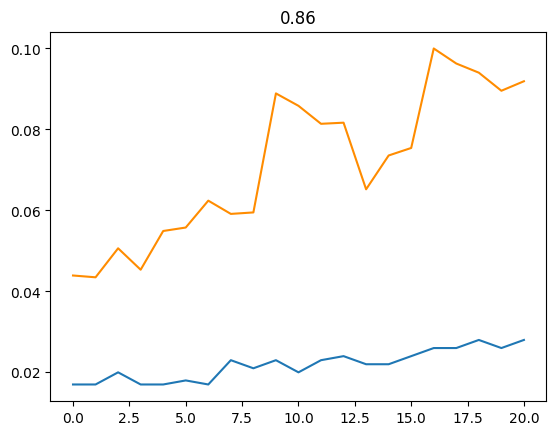

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['hispanic_pct'],label="Hispanic CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['hispanic_cs'],label="Hispanic CS",color='darkorange')
plt.title('Hispanic\nOrange: Student, Blue: Staff')
# plt.legend(['A', 'B'])
from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['hispanic_pct'], merged['hispanic_cs'])[0], 2))


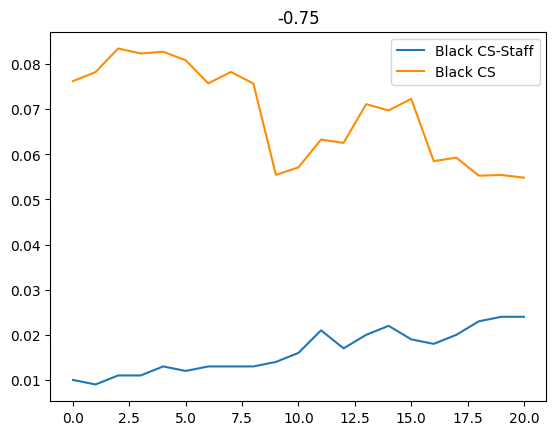

In [24]:
import pandas as pd
from matplotlib import pyplot as plt



all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['black_pct'],label="Black CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['black_cs'],label="Black CS",color='darkorange')

from scipy.stats import pearsonr
plt.title(round(pearsonr(merged['black_pct'], merged['black_cs'])[0], 2))


plt.legend()


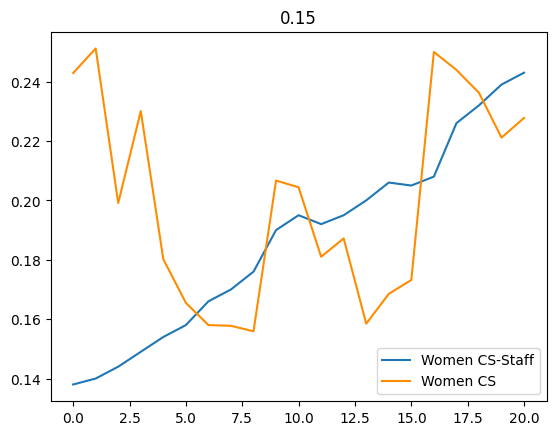

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['women_pct'],label="Women CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['women_cs'],label="Women CS",color='darkorange')

plt.title(round(pearsonr(merged['women_pct'], merged['women_cs'])[0], 2))


plt.legend()



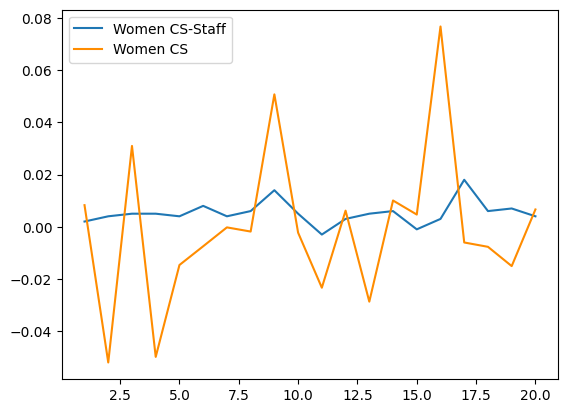

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
all   = pd.read_csv('staff_stud_stats.csv',index_col=0)
plt.plot(merged.index, merged['women_pct']-merged['women_pct'].shift(1),label="Women CS-Staff")
# plt.twinx()
plt.plot(merged.index, merged['women_cs']-merged['women_cs'].shift(1),label="Women CS",color='darkorange')



plt.legend()
